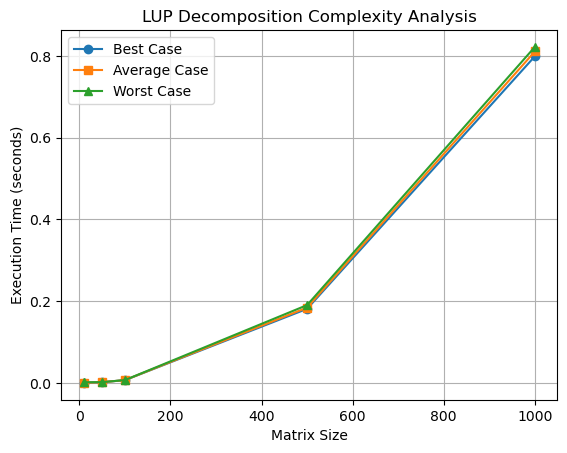

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lup_decomposition(A):
    n = len(A)
    P = np.eye(n)  # Initialize permutation matrix P
    L = np.zeros((n, n))  # Initialize lower triangular matrix L
    U = np.copy(A)  # Initialize upper triangular matrix U
    
    for k in range(n):
        p = 0
        k_prime = k
        
        # Find pivot element
        for i in range(k, n):
            if abs(U[i, k]) > p:
                p = abs(U[i, k])
                k_prime = i
        
        if p == 0:
            raise ValueError("Singular matrix")
        
        # Exchange rows in U matrix
        U[[k, k_prime]] = U[[k_prime, k]]
        
        # Exchange rows in L matrix
        L[[k, k_prime]] = L[[k_prime, k]]
        
        # Exchange rows in permutation matrix P
        P[[k, k_prime]] = P[[k_prime, k]]
        
        for i in range(k + 1, n):
            # Calculate multiplier
            L[i, k] = U[i, k] / U[k, k]
            
            # Eliminate elements below pivot
            U[i, k:] -= L[i, k] * U[k, k:]
    
    # Fill diagonal of L with ones
    for i in range(n):
        L[i, i] = 1.0
    
    return P, L, U

# Sizes of matrices to benchmark
sizes = [10, 50, 100, 500, 1000]

# Number of iterations for each matrix size
num_iterations = 10

# Dictionaries to store execution times for different cases
best_times = {}
average_times = {}
worst_times = {}

# Benchmarking
for size in sizes:
    # Initialize lists to store execution times for each iteration
    best_times[size] = []
    average_times[size] = []
    worst_times[size] = []
    
    for _ in range(num_iterations):
        # Generate random matrix of specified size
        A = np.random.rand(size, size)
        
        # Measure execution time
        start_time = time.time()
        P, L, U = lup_decomposition(A)
        end_time = time.time()
        exec_time = end_time - start_time
        
        # Store execution time
        best_times[size].append(exec_time)
        average_times[size].append(exec_time)
        worst_times[size].append(exec_time)

# Calculate best, average, and worst-case execution times
for size in sizes:
    best_times[size] = min(best_times[size])
    average_times[size] = sum(average_times[size]) / num_iterations
    worst_times[size] = max(worst_times[size])

# Plotting the graphs
plt.plot(sizes, list(best_times.values()), label='Best Case', marker='o')
plt.plot(sizes, list(average_times.values()), label='Average Case', marker='s')
plt.plot(sizes, list(worst_times.values()), label='Worst Case', marker='^')

# Adding labels to the graph
plt.title('LUP Decomposition Complexity Analysis')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()
